<a href="https://colab.research.google.com/github/Suesue098/Basic/blob/main/New%20York%20AirBnb%20open%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df1 = pd.read_csv('AB_NYC_2019.csv')

In [17]:
df1.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [18]:
df1.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [19]:
df1.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [20]:
df1.shape

(48895, 16)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [22]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
#handle missing values
df1.dropna(inplace = True)

In [25]:
df1.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,40.728129,-73.951149,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,1.069372e+07,7.589752e+07,0.054991,0.046693,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [26]:
df1.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

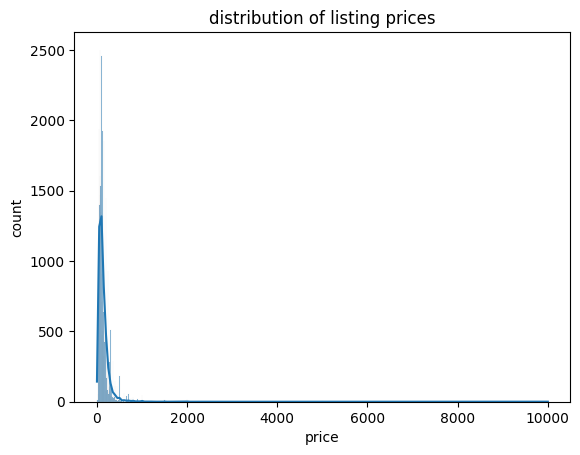

In [27]:
#data visualization
sns.histplot(df1['price'], kde=True)
plt.xlabel('price')
plt.ylabel('count')
plt.title('distribution of listing prices')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

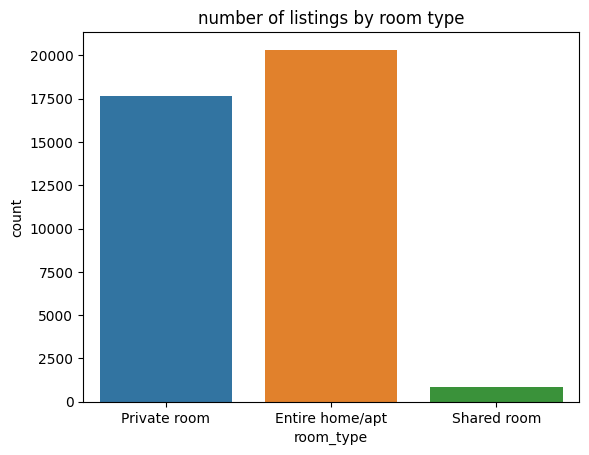

In [28]:
sns.countplot(x = 'room_type', data = df1)
plt.xlabel('room_type')
plt.ylabel('count')
plt.title('number of listings by room type')
plt.show

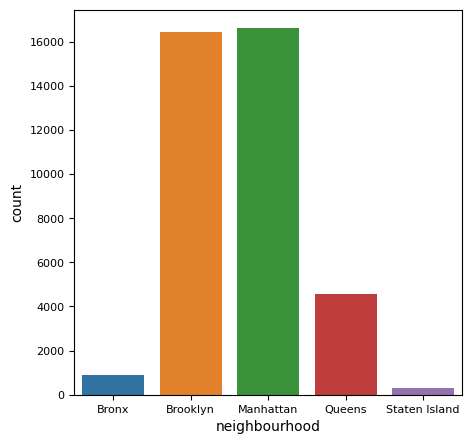

In [29]:
df1.rename(columns={'neighbourhood_group':'boroname'}, inplace = True)
borough_count = df1.groupby('boroname').agg('count').reset_index()

#plot the count by borough
fig, ax1 = plt.subplots(1,1,figsize=(5,5))
sns.barplot(x = 'boroname', y = 'id', data = borough_count, ax=ax1)
ax1.set_xlabel('neighbourhood', fontsize = 10)
ax1.set_ylabel('count',fontsize = 10)
ax1.tick_params(axis='both', labelsize = 8)

<function matplotlib.pyplot.show(close=None, block=None)>

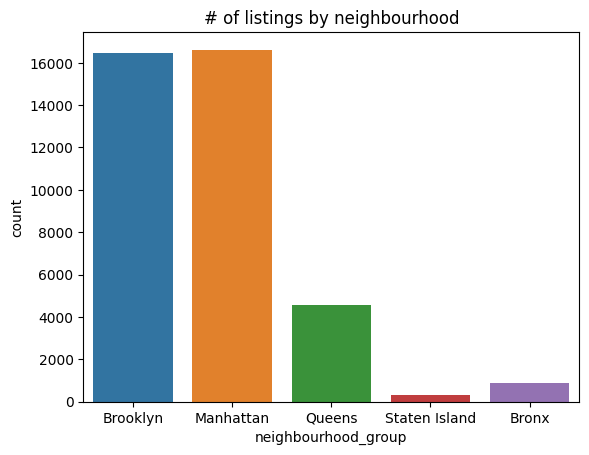

In [30]:
sns.countplot(x = 'boroname',data = df1)
plt.xlabel('neighbourhood_group')
plt.ylabel('count')
plt.title('# of listings by neighbourhood')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

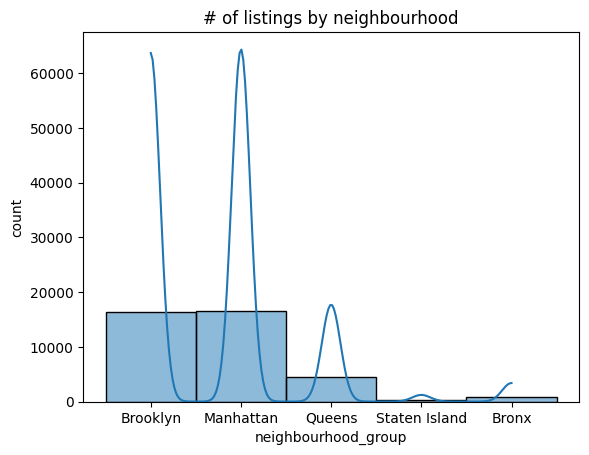

In [31]:
sns.histplot(df1['boroname'], kde=True)
plt.xlabel('neighbourhood_group')
plt.ylabel('count')
plt.title('# of listings by neighbourhood')
plt.show


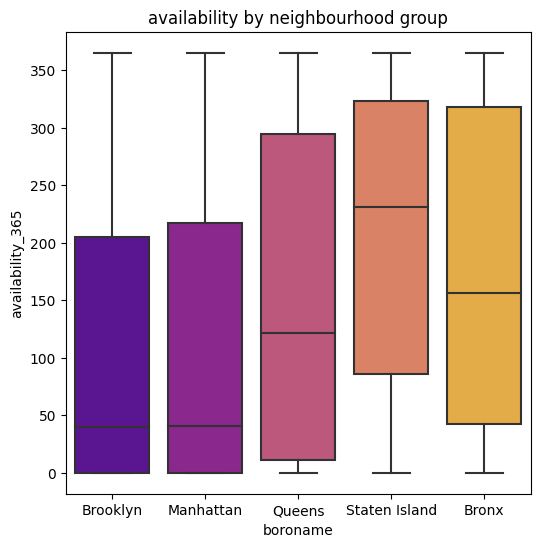

In [32]:
plt.figure(figsize = (6,6))
sns.boxplot(data = df1, x = 'boroname', y = 'availability_365', palette = 'plasma')
plt.title('availability by neighbourhood group')
plt.show()

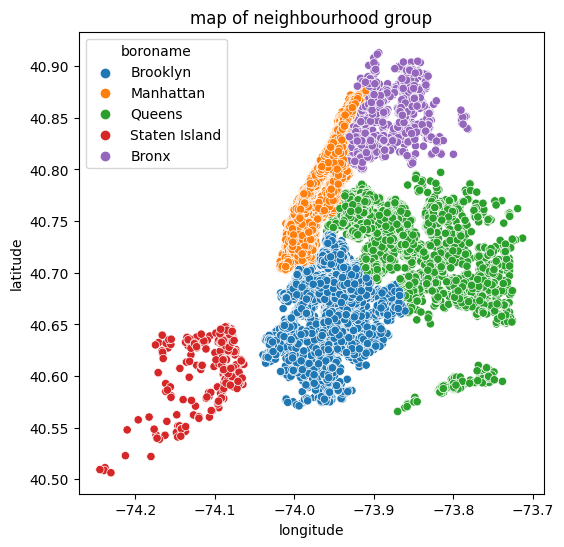

In [33]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = df1, x = 'longitude', y = 'latitude', hue = 'boroname')
plt.title('map of neighbourhood group')
plt.show()

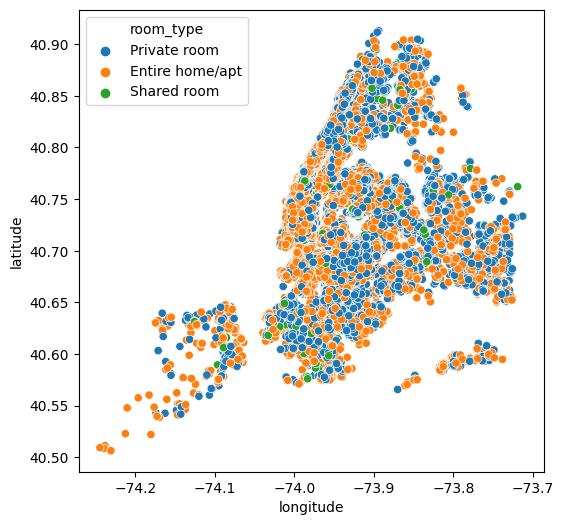

In [34]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = df1, x = 'longitude', y = 'latitude', hue = 'room_type')
plt.ioff()
plt.show()

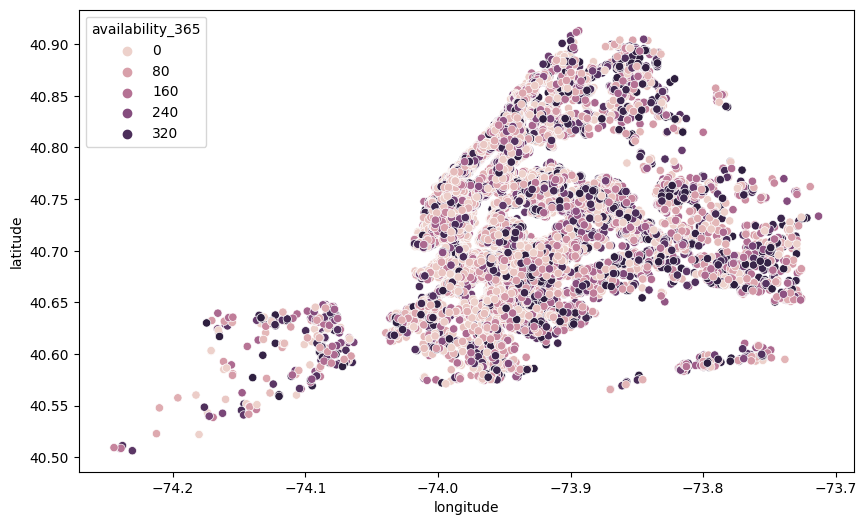

In [35]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = df1['longitude'], y = df1['latitude'],hue = df1['availability_365'])
#plt.ioff()
plt.show()

# Replace the 'reviews per month' by zero

In [36]:
#replace missing value
df1.fillna({'review_per_month': 0, 'name': 'Noname', 'host_name': 'Noname',
           'last_review': 'Notreviewd'}, inplace = True)

In [37]:
df1.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
boroname                          0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [38]:
## Descriptive statistics for the 'price' column
df1['price'].describe()

count    38821.000000
mean       142.332526
std        196.994756
min          0.000000
25%         69.000000
50%        101.000000
75%        170.000000
max      10000.000000
Name: price, dtype: float64

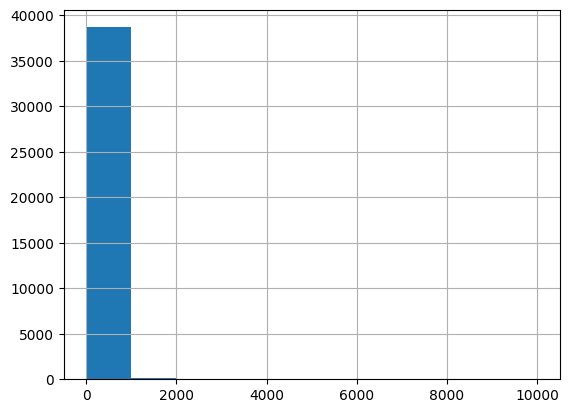

In [39]:
# Histogram of the 'price' column
hist_price = df1['price'].hist()
plt.show()

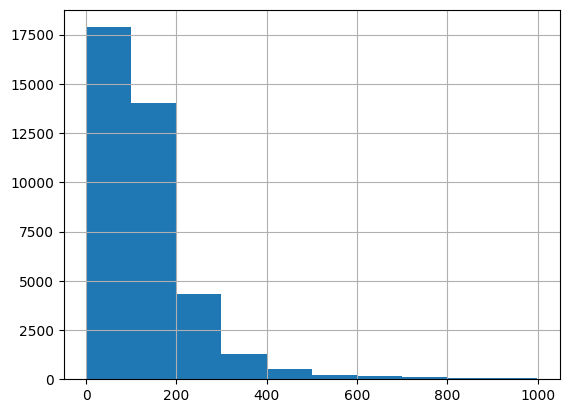

In [40]:
# Histogram of prices less than $1000
hist_price1 = df1['price'][df1['price'] < 1000].hist()
plt.show()

In [41]:
 #Filtering listings with price > 1000
 df1[df1["price"] > 1000]

,id,name,host_id,host_name,boroname,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,2018-05-05,0.33,11,0
762,273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,2018-09-25,0.31,4,297
1480,664047,Lux 2Bed/2.5Bath Central Park Views,836168,Henry,Manhattan,Upper West Side,40.77516,-73.98573,Entire home/apt,2000,30,59,2016-01-28,0.71,11,364
2018,893413,Architecturally Stunning Former Synagogue!,4751930,Martin,Manhattan,East Village,40.72668,-73.98179,Entire home/apt,2500,30,15,2019-07-01,0.26,1,89
2236,1056256,Beautiful eco triplex w/green roof. Free yoga/...,462379,Loretta,Brooklyn,Carroll Gardens,40.67881,-73.99379,Entire home/apt,1395,1,55,2019-06-02,0.73,2,362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45185,34592851,Beautiful Brooklyn Brownstone Production Space,19867664,Cheryl,Brooklyn,Crown Heights,40.67015,-73.94782,Entire home/apt,2500,1,1,2019-06-08,0.94,2,168
45666,34895693,Gem of east Flatbush,262534951,Sandra,Brooklyn,East Flatbush,40.65724,-73.92450,Private room,7500,1,8,2019-07-07,6.15,2,179
45967,35007240,7BR Lux Townhouse w/ Patio! Best Village Locat...,254624988,Matt,Manhattan,Greenwich Village,40.73655,-73.99618,Entire home/apt,1099,31,3,2019-06-14,2.31,1,193
46533,35297214,Amazing Chelsea 4BR Loft!,256649546,Viberlyn,Manhattan,Chelsea,40.73999,-73.99806,Entire home/apt,2995,30,1,2019-06-24,1.00,1,214


In [42]:
# Removing listings with price > 1000 (treating them as outliers)
df = df1[df1['price'] < 1000]

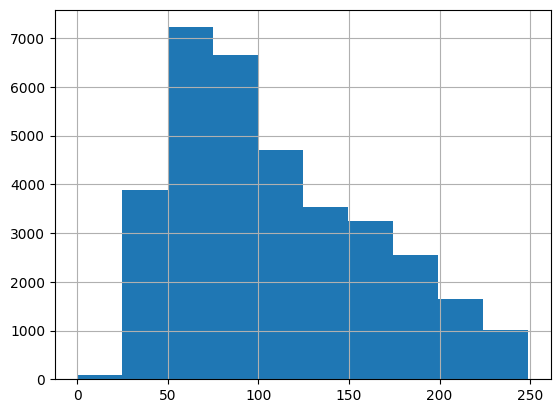

In [43]:
# Histogram of prices less than $250 after removing outliers
hist_price2 = df['price'][df['price'] <250].hist()
plt.show()

In [44]:
# Descriptive statistics for the 'price' column after filtering
df['price'].describe()

count    38684.000000
mean       135.201634
std        106.011604
min          0.000000
25%         69.000000
50%        100.000000
75%        169.000000
max        999.000000
Name: price, dtype: float64

In [45]:
# Count unique neighborhoods
df['neighbourhood'].value_counts()

Williamsburg          3159
Bedford-Stuyvesant    3135
Harlem                2200
Bushwick              1941
Hell's Kitchen        1524
                      ... 
Lighthouse Hill          2
New Dorp Beach           2
Richmondtown             1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 218, dtype: int64

In [46]:
# Filter neighborhoods with more than 200 listings
dfnh = df.groupby('neighbourhood'). filter(lambda x: x['neighbourhood'].count() > 200)

In [47]:
# Check the number of listings after filtering neighborhoods
len(dfnh['neighbourhood'])

32262

In [48]:
# Check for duplicate host_ids and find the maximum number of listings per host_id
df2 = df.groupby(['host_id'])

In [49]:
max(df2.size())

207

In [50]:
# Count the frequency of host_ids, show the first 5
df2.size().value_counts().head()

1    25854
2     2798
3      777
4      315
5      139
dtype: int64

In [51]:
df2.size().value_counts()

1      25854
2       2798
3        777
4        315
5        139
6         79
7         46
8         31
9         24
10        11
11         9
12         9
13         8
28         4
29         3
16         3
14         2
22         2
39         2
19         2
17         2
34         2
79         1
51         1
46         1
20         1
40         1
49         1
26         1
18         1
43         1
33         1
61         1
15         1
42         1
207        1
dtype: int64

In [52]:
# Finding the host_id with the maximum number of listings
host_id_counts = df2['host_id'].value_counts()
max_host = host_id_counts.idxmax()
max_host

(219517861, 219517861)

In [53]:
# Analyzing the distribution of room types
df1['room_type'].value_counts()

Entire home/apt    20321
Private room       17654
Shared room          846
Name: room_type, dtype: int64

In [54]:
# Calculating the average price per room type
rt_price = df1.groupby('room_type')['price'].mean()
rt_price

room_type
Entire home/apt    196.315929
Private room        83.985272
Shared room         63.213948
Name: price, dtype: float64

In [55]:
# Analyzing the 'minimum_nights' column
df1['minimum_nights'].describe()

count    38821.000000
mean         5.869220
std         17.389026
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       1250.000000
Name: minimum_nights, dtype: float64

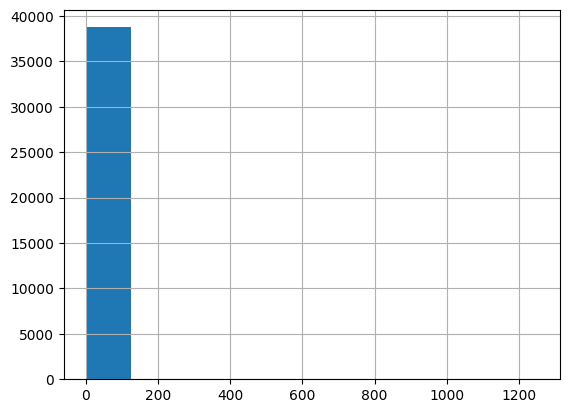

In [56]:
# Histogram of minimum nights
hist_mn = df1['minimum_nights'].hist()
plt.show()

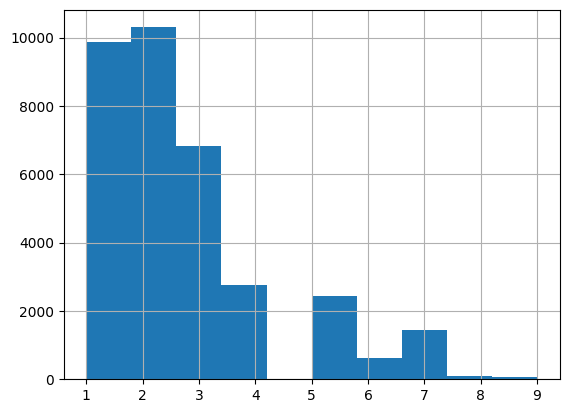

In [57]:
# Closer look at minimum nights
hist_mn1 = df1['minimum_nights'][df1['minimum_nights'] < 10].hist()
plt.show()

In [58]:
# Replacing records with minimum nights > 30 by 30
df1.loc[(df1.minimum_nights > 30), 'minimum_nights'] = 30

In [59]:
# Checking the correlation between minimum nights and price
df1['minimum_nights'].corr(df1['price'])

0.03172893235300177

In [60]:
# Analyzing the 'availability_365' column
df1['availability_365'].describe()

count    38821.000000
mean       114.886299
std        129.529950
min          0.000000
25%          0.000000
50%         55.000000
75%        229.000000
max        365.000000
Name: availability_365, dtype: float64

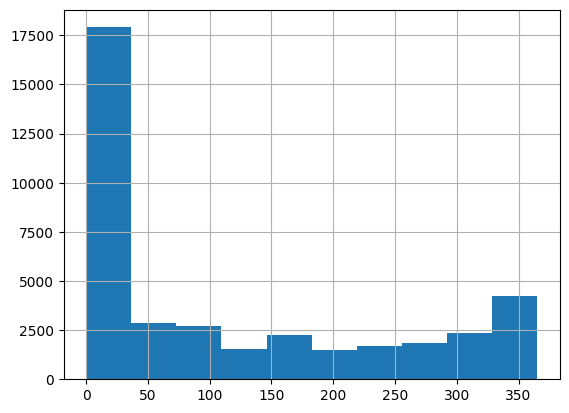

In [61]:
# Histogram of availability
df1['availability_365'].hist()
plt.show()

In [63]:
# Dropping columns that won't be useful in prediction
df1.drop(['latitude', 'longitude'], axis = 1, inplace = True)
df1.drop(['name', 'id', 'host_name','last_review'],
         axis = 1, inplace= True)

In [65]:
df1.head()

,host_id,boroname,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
5,7322,Manhattan,Murray Hill,Entire home/apt,200,3,74,0.59,1,129


# Neighbourhood Group Analysis

In [69]:
# Count listings in each neighborhood group
df1['boroname'].value_counts()

Manhattan        16621
Brooklyn         16439
Queens            4572
Bronx              875
Staten Island      314
Name: boroname, dtype: int64

In [72]:
# Calculate average price by neighborhood group
avg_price = df1.groupby('boroname')['price'].mean()
avg_price

boroname
Bronx             79.558857
Brooklyn         121.463289
Manhattan        180.071596
Queens            95.783683
Staten Island     89.964968
Name: price, dtype: float64

# Removing Nan values from the dataset

In [73]:
df1.isnull().sum()
df1.dropna(how = 'any', inplace = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         38821 non-null  int64  
 1   boroname                        38821 non-null  object 
 2   neighbourhood                   38821 non-null  object 
 3   room_type                       38821 non-null  object 
 4   price                           38821 non-null  int64  
 5   minimum_nights                  38821 non-null  int64  
 6   number_of_reviews               38821 non-null  int64  
 7   reviews_per_month               38821 non-null  float64
 8   calculated_host_listings_count  38821 non-null  int64  
 9   availability_365                38821 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 3.3+ MB


In [74]:
df1.columns

Index(['host_id', 'boroname', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

# Regression Analysis

In [75]:
# Create one-hot encoded features for categorical variables
dataset_onehot = pd.get_dummies(df1, columns=[
    'boroname', 'neighbourhood','room_type'],
    prefix = ['ng', 'nh', 'rt'], drop_first = True)

In [76]:
dataset_onehot.head()

,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,ng_Brooklyn,ng_Manhattan,ng_Queens,...,nh_Whitestone,nh_Williamsbridge,nh_Williamsburg,nh_Willowbrook,nh_Windsor Terrace,nh_Woodhaven,nh_Woodlawn,nh_Woodside,rt_Private room,rt_Shared room
0,2787,149,1,9,0.21,6,365,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2845,225,1,45,0.38,2,355,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4869,89,1,270,4.64,1,194,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7192,80,10,9,0.10,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,7322,200,3,74,0.59,1,129,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# Split data into features (X) and target variable (Y)
X = dataset_onehot.drop(['price'], axis = 1)
Y = dataset_onehot['price']

In [78]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X,
                        Y, test_size = 0.2, random_state = 42 )

# Linear Regression

In [79]:
# Fit Linear Regression model
regression_model = LinearRegression().fit(x_train, y_train)

In [80]:
# Calculate R-squared value
r_squared = regression_model.score(x_train, y_train)

In [81]:
# Predict using the model
y_pred = regression_model.predict(x_test)

In [85]:
# Calculate RMSE
import sklearn.metrics as metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

166.66257749471683

# LASSO

In [87]:
# Fit Lasso Regression model
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 0.01)
lasso_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.392e+08, tolerance: 1.247e+05
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [91]:
# Calculate RMSE for Lasso model
y_pred_lasso = lasso_model.predict(x_test)
rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test,
                                                y_pred_lasso))
rmse_lasso

166.56674503387248

In [93]:
# Display Lasso model coefficients
lasso_coefficients = pd.DataFrame(columns = ['Variable','Coefficient'])
lasso_coefficients['Variable'] = x_train.columns
lasso_coefficients['Coefficient'] = lasso_model.coef_
lasso_coefficients_sorted = lasso_coefficients.sort_values('Coefficient')

lasso_coefficients_sorted

,Variable,Coefficient
228,rt_Shared room,-128.142833
227,rt_Private room,-96.770639
111,nh_Inwood,-80.886056
213,nh_Washington Heights,-67.882118
129,nh_Marble Hill,-45.745086
...,...,...
7,ng_Manhattan,90.733220
174,nh_Riverdale,99.657453
20,nh_Bayside,104.407861
204,nh_Tribeca,256.188473
